In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
%matplotlib inline

r = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita')
gdptable = r.text
soup = BeautifulSoup(gdptable, 'lxml')
table = soup.find('table', attrs = {"class" :"wikitable sortable"})
theads=[]
for tx in table.findAll('th'):
    theads.append(tx.text)

data =[]
for rows in table.findAll('tr'):
        row={}
        i=0
        for cell in rows.findAll('td'):
            row[theads[i]]=re.sub('\xa0', '',cell.text)
            i+=1
        if len(row)!=0:
            data.append(row)
print(data)
#http://arijitgeek.me/index.php/2016/11/18/wiki-table-python-script-to-fetch-tables-from-wikipedia-to-pandas-dataframe/

In [13]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [20]:
data= pd.read_csv('GDP.csv',index_col=0,encoding = "utf-8")

In [21]:
data

,Country,Rank,US$
0,Luxembourg,1,"103,199"
1,Switzerland,2,"79,242"
2,Norway,3,"70,392"
3,Macau,—,"67,079"
4,Ireland,4,"62,562"
5,Qatar,5,"60,787"
6,Iceland,6,"59,629"
7,United States,7,"57,436"
8,Denmark,8,"53,744"
9,Singapore,9,"52,961"


In [22]:
gdp = pd.DataFrame(data)

In [23]:
gdp.head()

,Country,Rank,US$
0,Luxembourg,1,"103,199"
1,Switzerland,2,"79,242"
2,Norway,3,"70,392"
3,Macau,—,"67,079"
4,Ireland,4,"62,562"


In [24]:
gdp = gdp.rename(columns = {'US$':'gdp_per_capita'})

In [25]:
gdp.head()

,Country,Rank,gdp_per_capita
0,Luxembourg,1,"103,199"
1,Switzerland,2,"79,242"
2,Norway,3,"70,392"
3,Macau,—,"67,079"
4,Ireland,4,"62,562"


In [26]:
del gdp['Rank']

In [27]:
gdp.head()

,Country,gdp_per_capita
0,Luxembourg,"103,199"
1,Switzerland,"79,242"
2,Norway,"70,392"
3,Macau,"67,079"
4,Ireland,"62,562"


In [28]:
gdp.gdp_per_capita.describe()

count       191
unique      191
top       2,609
freq          1
Name: gdp_per_capita, dtype: object

In [29]:
gdp['gdp_per_capita'] = gdp['gdp_per_capita'].apply(lambda x: re.sub(',','',x))

In [30]:
gdp.head()

,Country,gdp_per_capita
0,Luxembourg,103199
1,Switzerland,79242
2,Norway,70392
3,Macau,67079
4,Ireland,62562


In [31]:
gdp['gdp_per_capita'] = gdp['gdp_per_capita'].apply(pd.to_numeric)

In [32]:
gdp.head()

,Country,gdp_per_capita
0,Luxembourg,103199
1,Switzerland,79242
2,Norway,70392
3,Macau,67079
4,Ireland,62562


In [33]:
gdp.gdp_per_capita.mean()

13037.277486910994

In [34]:
gdp.gdp_per_capita.describe()

count       191.000000
mean      13037.277487
std       17754.516597
min         233.000000
25%        1904.500000
50%        5193.000000
75%       15821.500000
max      103199.000000
Name: gdp_per_capita, dtype: float64

In [35]:
gdp50000 = gdp[gdp['gdp_per_capita'] > 50000]

In [36]:
gdp50000

,Country,gdp_per_capita
0,Luxembourg,103199
1,Switzerland,79242
2,Norway,70392
3,Macau,67079
4,Ireland,62562
5,Qatar,60787
6,Iceland,59629
7,United States,57436
8,Denmark,53744
9,Singapore,52961


In [37]:
sgdp = gdp[gdp['Country'].str.startswith('S')]

In [38]:
sgdp

,Country,gdp_per_capita
1,Switzerland,79242
9,Singapore,52961
11,Sweden,51165
12,San Marino,46447
28,South Korea,27539
29,Spain,26609
37,Slovenia,21320
38,Saudi Arabia,20150
43,Slovakia,16499
46,Saint Kitts and Nevis,16058


In [39]:
len(sgdp)

25

In [42]:
sand500gdp = gdp[(gdp.gdp_per_capita > 50000) & (gdp.Country.str.startswith('S'))]

In [43]:
sand500gdp

,Country,gdp_per_capita
1,Switzerland,79242
9,Singapore,52961
11,Sweden,51165


In [44]:
sor500gdp = gdp[(gdp.gdp_per_capita > 50000) | (gdp.Country.str.startswith('S'))]

In [45]:
sor500gdp

,Country,gdp_per_capita
0,Luxembourg,103199
1,Switzerland,79242
2,Norway,70392
3,Macau,67079
4,Ireland,62562
5,Qatar,60787
6,Iceland,59629
7,United States,57436
8,Denmark,53744
9,Singapore,52961


In [46]:
gdp50000.gdp_per_capita.sum()

770046

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C732F5E978>]],
      dtype=object)

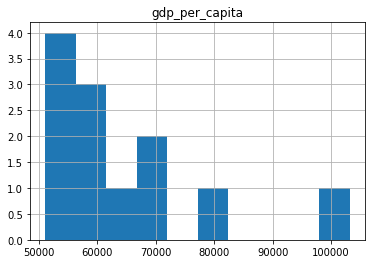

In [47]:
gdp50000.hist()

In [48]:
country = pd.read_csv("Country.csv")

In [49]:
country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [50]:
gdpfinal = pd.merge(gdp,country, how = 'inner', left_on='Country', right_on = 'TableName')

In [51]:
gdpfinal

,Country,gdp_per_capita,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Luxembourg,103199,LUX,Luxembourg,Luxembourg,Grand Duchy of Luxembourg,LU,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,NaN,Yes,2010,2010.0,2013.0,1999.0
1,Switzerland,79242,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
2,Norway,70392,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
3,Ireland,62562,IRL,Ireland,Ireland,Ireland,IE,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2010.0,2013.0,1979.0
4,Qatar,60787,QAT,Qatar,Qatar,State of Qatar,QA,Qatari riyal,NaN,Middle East & North Africa,...,Budgetary central government,General Data Dissemination System (GDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2012",NaN,Yes,NaN,2010.0,2013.0,2005.0
5,Iceland,59629,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
6,United States,57436,USA,United States,United States,United States of America,US,U.S. dollar,Fiscal year end: September 30; reporting perio...,North America,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0
7,Denmark,53744,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
8,Singapore,52961,SGP,Singapore,Singapore,Republic of Singapore,SG,Singapore dollar,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"National Health Survey (NHS), 2010",NaN,Yes,NaN,2011.0,2013.0,1975.0
9,Australia,51850,AUS,Australia,Australia,Commonwealth of Australia,AU,Australian dollar,Fiscal year end: June 30; reporting period for...,East Asia & Pacific,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0


In [52]:
gdpregion = gdpfinal.groupby(['Region']).mean()

In [53]:
gdpregion

,gdp_per_capita,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
Region,,,,
East Asia & Pacific,11515.043478,2009.000000,2012.363636,2001.933333
Europe & Central Asia,25510.111111,2009.918919,2012.380952,2005.886364
Latin America & Caribbean,9283.068966,2007.076923,2012.000000,2005.607143
Middle East & North Africa,17910.937500,2009.642857,2012.200000,2002.625000
North America,49823.000000,2009.500000,2013.000000,1995.500000
South Asia,2751.875000,2008.500000,2012.000000,2006.625000
Sub-Saharan Africa,2311.720930,2007.937500,2010.825000,2002.697674


In [54]:
gdppivot = gdpfinal.pivot_table(index=['Region'], margins=True, aggfunc=np.mean)

In [55]:
gdppivot

,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,gdp_per_capita
Region,,,,
East Asia & Pacific,2009.000000,2012.363636,2001.933333,11515.043478
Europe & Central Asia,2009.918919,2012.380952,2005.886364,25510.111111
Latin America & Caribbean,2007.076923,2012.000000,2005.607143,9283.068966
Middle East & North Africa,2009.642857,2012.200000,2002.625000,17910.937500
North America,2009.500000,2013.000000,1995.500000,49823.000000
South Asia,2008.500000,2012.000000,2006.625000,2751.875000
Sub-Saharan Africa,2007.937500,2010.825000,2002.697674,2311.720930
All,NaN,NaN,NaN,NaN


In [56]:
gdppivot.drop(['LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData'], axis=1, inplace=True)

In [57]:
gdppivot

,gdp_per_capita
Region,
East Asia & Pacific,11515.043478
Europe & Central Asia,25510.111111
Latin America & Caribbean,9283.068966
Middle East & North Africa,17910.937500
North America,49823.000000
South Asia,2751.875000
Sub-Saharan Africa,2311.720930
All,NaN
